# The Competition

Overall goal: Identify predictors of poverty to maximize the impact and cost effectiveness of poverty reduction interventions.


- Binary classification

- Competition metric is mean log loss:
$$ - \frac{1}{M} \sum\limits_{m = 1}^{M} \frac{1}{N_m} \sum\limits_{n = 1}^{N_m} [y_nlog(\hat{y})+(1-y_n)log(1-\hat{y_n})]$$

- Three countries 

In [2]:
import sys
sys.path.append("/Users/Bing/Documents/DS/DrivenData/Pover-T/Scripts/") # need to add path to the parent folder where CV.py is

from PoverTHelperTools import *

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Overview of the data

In [3]:
hhold_a_train, hhold_b_train, hhold_c_train = load_hhold_train()
indiv_a_train, indiv_b_train, indiv_c_train = load_indiv_train()

- Two sets of data for each country. Individual and household data.

- Will predict on household. Individual data is to construct new features.

- All data is obfuscated.

In [4]:
hhold_a_train.head()

,wBXbHZmp,SlDKnCuu,KAJOWiiw,DsKacCdL,rtPrBBPl,tMJrvvut,jdetlNNF,maLAYXwi,vwpsXRGk,sArDRIyX,...,sDGibZrP,CsGvKKBJ,OLpGAaEu,LrDrWRjC,JCDeZBXq,HGPWuGlV,GDUPaBQs,WuwrCsIY,AlDbXTlZ,country
id,,,,,,,,,,,,,,,,,,,,,
46107,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,XAmOF,MwLvg,...,JqHnW,MaXfS,etZsD,idRwx,LPtkN,vkbkA,qQxrL,AITFl,aQeIm,A
82739,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,lwCkE,MwLvg,...,JqHnW,MaXfS,HxnJy,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
9646,JhtDR,GUusz,BIZns,ZYabk,uxuSS,PHMVg,NDTCU,sehIp,qNABl,MwLvg,...,JqHnW,MaXfS,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
10975,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,sPNOc,MwLvg,...,JqHnW,MaXfS,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
16463,JhtDR,alLXR,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,NdlDR,MwLvg,...,JqHnW,MaXfS,etZsD,idRwx,UyAms,vkbkA,qQxrL,GAZGl,aQeIm,A


In [5]:
indiv_a_train.head()

HeUgMnzF CaukPfUC MzEtIdUF gtnNTNam SWoXNmPc eXbOkwhI  OdXpbPGJ  \
id    iid                                                                   
80389 1      XJsPz    mOlYV    UFoKR    SSvEP    onRNG    YXCNt       4.0   
      2      XJsPz    mOlYV    axSTs    CXizI    onRNG    YXCNt       4.0   
      3      TRFeI    mOlYV    axSTs    CXizI    NDnCs    YXCNt       4.0   
      4      XJsPz    yAyAe    FRcdT    CXizI    onRNG    YXCNt       NaN   
39883 1      XJsPz    mOlYV    UFoKR    HIvIU    onRNG    YXCNt       4.0   

          XONDGWjH KsFoQcUV qYRZCuJD   ...   ukWqmeSS qqVibbSA MgCoFhXK  \
id    iid                              ...                                
80389 1      oArAw    kpkiH    fohru   ...        181    QQdHS    uEstx   
      2      ccbZA    HgfUG    fohru   ...        141    QQdHS    uEstx   
      3      fOUHD    HgfUG    oEref   ...         41    QQdHS    gCSRj   
      4      fOUHD    HgfUG    fohru   ...         16    QQdHS    uEstx   
39883 1      oArAw    kpkiH    fohru   ...        381    QQdHS    uEstx   

          rFpoTXAq RXcLsVAQ rQWIpTiG XizJGmbu xqUooaNJ   poor country  
id    iid                                                              
80389 1      Hikoa    zQvdC    xUYIC    juMSt    dSJoN   True       A  
      2      Hikoa    zQvdC    xUYIC    juMSt    JTCKs   True       A  
      3      Hikoa    zQvdC    rkLqZ    juMSt    JTCKs   True       A  
      4      Hikoa    zQvdC    jVHyH    GtHel    JTCKs   True       A  
39883 1      Hikoa    zQvdC    xUYIC    juMSt    UaIsy  False       A  

[5 rows x 42 columns]

- 6,000-8,000 samples (160-440 features)
- Majority are categorical features

# Target balance?

Percent True for country ['A']: 45.14
Percent True for country ['B']: 7.71
Percent True for country ['C']: 15.04


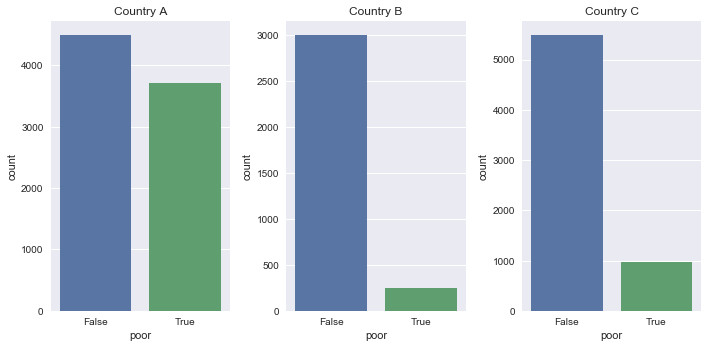

In [6]:
def target_ratio(df):
    positive = df[df['poor'] == 1].shape[0]
    return (positive/df.shape[0]*100)

for i in [hhold_a_train, hhold_b_train, hhold_c_train]:
    print('Percent True for country {}: {:0.2f}'.format(i['country'].unique(),target_ratio(i)))
    
fig, ax = plt.subplots(1,3, figsize=(10,5))
sns.countplot(hhold_a_train['poor'], ax = ax[0])
ax[0].set_title('Country A')
sns.countplot(hhold_b_train['poor'], ax = ax[1])
ax[1].set_title('Country B')
sns.countplot(hhold_c_train['poor'], ax = ax[2])
ax[2].set_title('Country C')
sns.despine()
plt.tight_layout()

# Data cleaning and feature engineering

- Started with a benchmark RandomForest model with all features --> ~0.57 mean logloss

- Can I improve with feature engineering and data cleaning?

- Removed NaNs

### Numericals

In [7]:
def select_numerical(df):
    num = df.select_dtypes(include=['int64', 'float64'])   
    return num

def select_categorical(df):
    cat = df.select_dtypes(include=['object', 'category'])   
    return cat

In [10]:
# using country A as an example
a_num = select_numerical(hhold_a_train)
a_num['poor'] = hhold_a_train['poor']

print('Number of unique values in the column:')
for col in a_num.columns[:-1]: # [:-1] don't include 'poor' in the columns
    print(col, a_num[col].nunique())

Number of unique values in the column:
nEsgxvAq 11
OMtioXZZ 13
YFMZwKrU 6
TiwRslOh 18


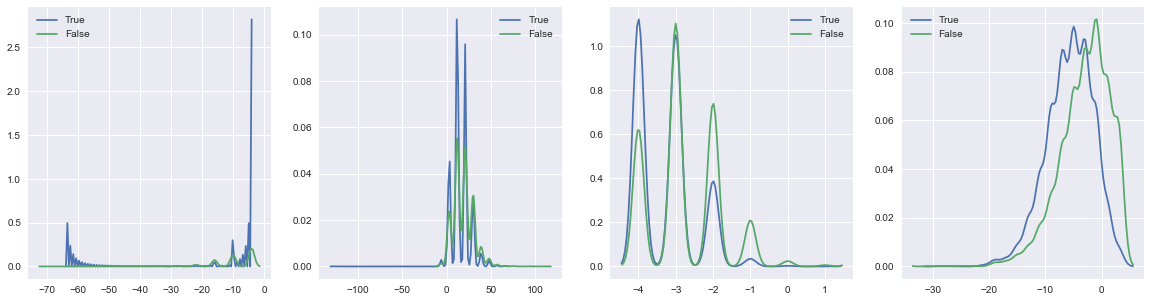

In [11]:
fig, ax = plt.subplots(1,4, figsize = (20,5))
for i, col in enumerate(a_num.columns[:-1]):
    sns.kdeplot(a_num[a_num['poor']==1][col], ax=ax[i], label = True)
    sns.kdeplot(a_num[a_num['poor']==0][col], ax=ax[i], label = False)

### Categoricals 

In [12]:
a_cat = select_categorical(hhold_a_train)
a_cat['poor'] = hhold_a_train['poor']

c_cat = select_categorical(hhold_c_train)
c_cat['poor'] = hhold_c_train['poor']

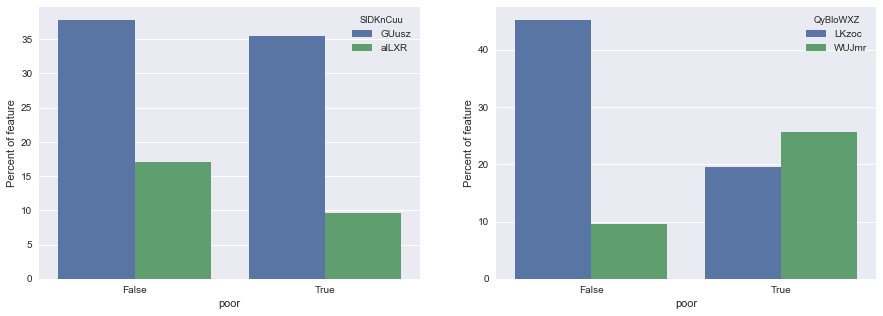

In [13]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.barplot('poor', y = 'poor', hue = 'SlDKnCuu', data = a_cat,estimator=lambda x: len(x) / len(a_cat) * 100, ax = ax[0])
ax[0].set_ylabel('Percent of feature')
sns.barplot('poor', y = 'poor', hue = 'QyBloWXZ', data = a_cat,estimator=lambda x: len(x) / len(a_cat) * 100, ax = ax[1])
ax[1].set_ylabel('Percent of feature')

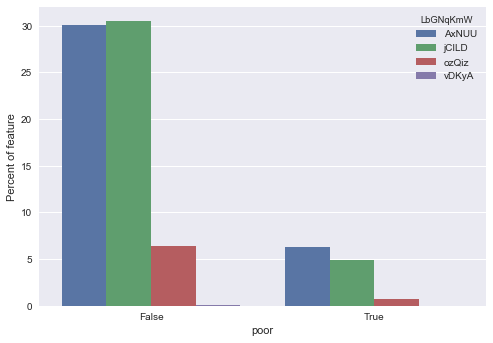

In [14]:
# Country B and C need a different strategy
sns.barplot('poor', y = 'poor', hue = 'LbGNqKmW', data = c_cat,estimator=lambda x: len(x) / len(a_cat) * 100)
plt.ylabel('Percent of feature')

- Removed features with one unique value, removed correlated features

- Created new 'num_indiv' feature from individual data set

# A big problem...

Log loss is similar to using accuracy to measure performance on unbalanced data sets, it's not a good metric.

$$ - \frac{1}{M} \sum\limits_{m = 1}^{M} \frac{1}{N_m} \sum\limits_{n = 1}^{N_m} [y_nlog(\hat{y})+(1-y_n)log(1-\hat{y_n})]$$


- Strongly penalizes confident but wrong predictions, penalizes less conservative but wrong predictions.
- Does not distinguish between False Positives/Negatives from TP/TN.
- Example: let's say there's a threshold of 0.5 (<0.5 == False)
    - the model can predict 'False' either with probability of ~0.4 or ~0.1
    - But let's say the actual value is 'True'
    - Log loss for 0.4 is 0.92
    - Log loss for 0.1 is 2.3!
    - Both are false negatives



Demonstration: switching to terminal...

In [17]:
# Note: activate env, then run CV_B.py and CV_B_resampled.py

# Machine Learning

#### Cross validation

Difficult to create a cross validation that would emulate the test set. 


- Stratified KFold to preserve the class balances, then:
    - Within the KFold CV loop:
        - Resample the minority class (Tried up and down sampling, as well as SMOTE) Up and Downsampling were similar in performance. SMOTE made things worse
        - Standardize numericals **_inside_** the loop, otherwise data leaks into CV (ex: Average of a feature in k-fold could be different from the average of that feature in the whole train set)
        
#### Resampling
- Using resampling on the whole train set to predict on test set made things worse! CV and test set scores differ quite a bit. 

    - Hypothesis: Test set and Train set distributions were different. Tried Adversarial validation.         
    - Result: Classifier can not distinguish between train and test set samples; they are of similar distributions.

#### Models

- Logistic Regression, Random Forest, and Gradient Boosted Machines from sklearn
- LightGBM
- XGBoost was the best. Used GridSearch to tune better.
